In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# %%
# Cargo datos de entrenamiento 
archivo =  '../data/processed/X_train.feather'
X_train = pd.read_feather(archivo )
X_train.drop(['index'],axis=1)
print(X_train.shape)

archivo = '../data/processed/y_train.feather'
y_train = pd.read_feather(archivo )
y_train = y_train['es_desertor']
print(y_train.shape)

# %%
# cargo datos de test 
archivo =  '../data/processed/X_test.feather'
X_test= pd.read_feather(archivo )
X_test.drop(['index'],axis=1)
print(X_test.shape)

archivo = '../data/processed/y_test.feather'
y_test = pd.read_feather(archivo )
y_test = y_test['es_desertor']
print(y_test.shape)

(100794, 95)
(100794,)
(25199, 95)
(25199,)


In [3]:
X_test = X_test.drop(['index'],axis=1)
X_train = X_train.drop(['index'],axis=1)

best mean cross-validation score: 0.909
best parameters: {'max_depth': 7}


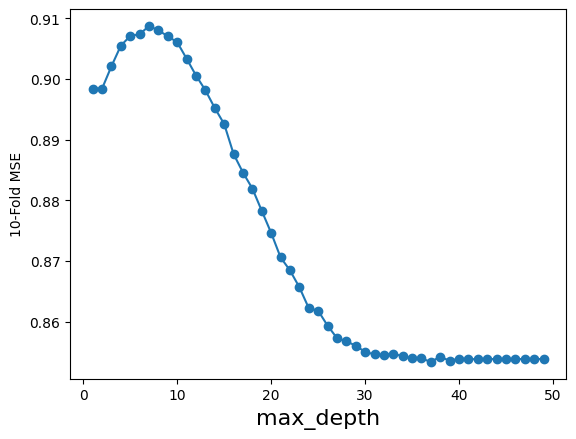

In [4]:
from sklearn.tree import DecisionTreeClassifier
maxDepth = range(1,50)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')

plt.show()

In [5]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

#dt=DecisionTreeClassifier().fit(X_train,y_train)
Y_pred_Tree = treeModel.predict(X_test)

print('Precisión Árboles de Decisión Clasificación: {}'.format(treeModel.score(X_test,y_test)))


Train:  0.9114927475841816
Test:  0.9113456883209651
Precisión Árboles de Decisión Clasificación: 0.9113456883209651


In [6]:
#Reviso con MAtriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred_Tree)
print(cm)


[[19805   526]
 [ 1708  3160]]


In [7]:
#Metricas
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred_Tree))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     20331
           1       0.86      0.65      0.74      4868

    accuracy                           0.91     25199
   macro avg       0.89      0.81      0.84     25199
weighted avg       0.91      0.91      0.91     25199



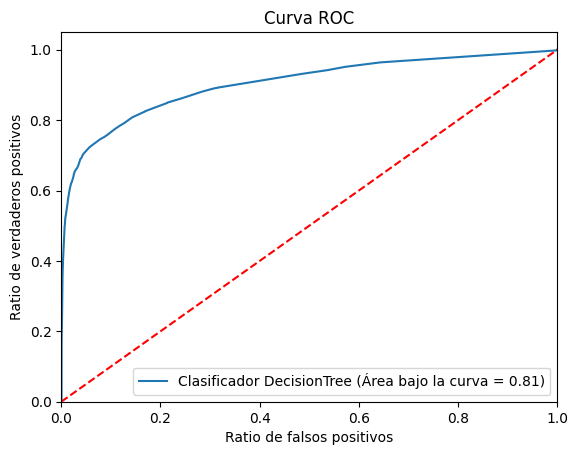

In [8]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, treeModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, treeModel.predict_proba(X_test)[:,1])
roc_ad = round(logit_roc_auc,2)
plt.figure()
plt.plot(fpr, tpr, label='Clasificador DecisionTree (Área bajo la curva = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de falsos positivos')
plt.ylabel('Ratio de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC') si descomentas esta línea puedes guardar la gráfica
plt.show()